# notebook-001-3
*This notebook was run on macOS Catalina (Version 10.15.4) with the following specs:*

    * Processor: 2.7 GHz Dual-Core Intel Core i5
    * Memory: 8 GB 1867 MHz DDR3

Here we will demonstrate an example of running patchMAP to create a cobordism connecting different datasets. We will be using the digits dataset from the sklearn package.

First import the necessary modules.

In [1]:
import sys
sys.version

'3.7.2 (v3.7.2:9a3ffc0492, Dec 24 2018, 02:44:43) \n[Clang 6.0 (clang-600.0.57)]'

In [3]:
# import patchmap module
from miaaim.patchmap import patchmap_
from miaaim.patchmap import utils
# import external modules
import scipy.sparse
from sklearn.datasets import load_digits
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Now we will we will read in the example data from the digits dataset. We will then cut each individual digit into its own data frame to feed as input to the `compute_cobordism` function of the `patchmap` workflow.

In [6]:
# Load digits data
digits = load_digits()
dat = pd.DataFrame(digits['data'])
# Get the factor manifold IDs
nms = pd.DataFrame(digits['target'],columns=["target"])
# Create a combined data frame with names and data
dat_pd = pd.concat([dat,nms],axis=1)

# Create a list to store all digits in
digits_pd_list = []
digits_np_list = []
# Iterate through digits and create datafames for stitiching
for i in range(0,10):
    # Hold out digit i
    tmp = dat_pd.loc[dat_pd["target"]==i]
    # Update the pandas list
    digits_pd_list.append(tmp)
    # Update the numpy list
    digits_np_list.append(tmp.iloc[:,:64].values)

# Concatenate the lists
pandas_digits = pd.concat(digits_pd_list)
np_digits = np.vstack(digits_np_list)
# Create a colormap for the chosen labels
cmap = utils.discrete_cmap(len(pandas_digits['target'].unique()), 'tab20_r')
# Create colors
colors = [cmap(i) for i in pandas_digits['target']]

Now use the `compute_cobordism` function to create a higher-dimensional manifold that models similarity between each of the digits in the dataset. 

In [7]:
# set number of nearest neighbors
nn = 150
# run the simiplicial set patching
patched_simplicial_set = patchmap_.compute_cobordism(
                                    digits_np_list,
                                    n_neighbors = nn
                                    )

Now embed the cobordism into two-dimensional space for visualization.

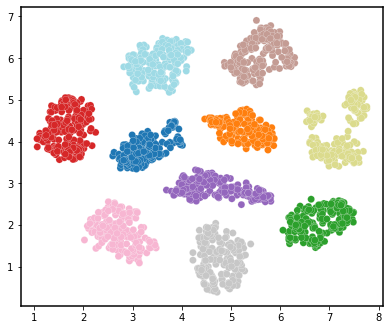

In [8]:
# embed the data
out = patchmap_.embed_cobordism(
                                digits_np_list,
                                patched_simplicial_set,
                                2,
                                n_epochs=200,
                                random_state=2,
                                min_dist = 0.1
                                )

# plot the results of embedded data
plt.rcParams['axes.linewidth'] = 1.5
fig, ax = plt.subplots(figsize=[6.5, 5.5])
im = ax.scatter(out[:,0], out[:,1], c = colors, s=50,cmap=cmap, edgecolor='white',linewidths=0.2)